In [1]:
import pandas as pd
# Load the dataset, handling potential errors with 'error_bad_lines' and 'on_bad_lines'
df = pd.read_csv('flight_data.csv')
#Giridharan-231801040
#Gowtham (231801044)
# Display the first few rows of the dataset to understand its structure
print(df.head())
print(df.columns)

   MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN DEST  DEP_TIME  \
0      2             1            6                MQ    CLT  LYH    1430.0   
1      2             8            6                MQ    CLT  LYH    1442.0   
2      2            13            4                MQ    DFW  SHV    2247.0   
3      2            14            5                MQ    DFW  SHV    2230.0   
4      2            15            6                MQ    DFW  SHV    2246.0   

   DEP_DEL15  DISTANCE  Unnamed: 9  
0        0.0     175.0         NaN  
1        0.0     175.0         NaN  
2        0.0     190.0         NaN  
3        0.0     190.0         NaN  
4        0.0     190.0         NaN  
Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'DEST', 'DEP_TIME', 'DEP_DEL15', 'DISTANCE', 'Unnamed: 9'],
      dtype='object')


In [85]:
# Step 1: Check if 'Unnamed: 9' exists and drop it if present
if 'Unnamed: 9' in df.columns:
    df.drop(columns=['Unnamed: 9'], inplace=True)
    print("'Unnamed: 9' column dropped")
else:
    print("'Unnamed: 9' column not found in the dataset")

#counting missing values
# Check for missing values
# Drop duplicate rows
df.drop_duplicates(inplace=True)

missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values[missing_values > 0])
print("\n")



'Unnamed: 9' column dropped
Missing Values in each column:
DEP_TIME     4033
DEP_DEL15    4046
dtype: int64




In [87]:
import pandas as pd

# Assuming flight_data is already loaded
#df =pd.read_csv('flight_data.csv') # Make a copy of your dataset to avoid modifying the original DataFrame

# Step 3: Handle missing values
# For numerical columns, use mean
numerical_cols = ['DEP_TIME', 'DISTANCE']  # Adjust the column names if necessary
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# For categorical columns, use mode
categorical_cols = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST']  # Adjust the column names if necessary
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Drop column 'Unnamed: 9' since it contains only NaN values
df.drop(columns=['Unnamed: 9'], inplace=True, errors='ignore')  # Use errors='ignore' if the column might not exist

# Display the updated DataFrame
print(df.head())


   MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN DEST  DEP_TIME  \
0      2             1            6                MQ    CLT  LYH    1430.0   
1      2             8            6                MQ    CLT  LYH    1442.0   
2      2            13            4                MQ    DFW  SHV    2247.0   
3      2            14            5                MQ    DFW  SHV    2230.0   
4      2            15            6                MQ    DFW  SHV    2246.0   

   DEP_DEL15  DISTANCE  
0        0.0     175.0  
1        0.0     175.0  
2        0.0     190.0  
3        0.0     190.0  
4        0.0     190.0  


In [89]:
# Step 3: Handle missing values without inplace modification
# For numerical columns, use mean or median
numerical_cols = ['DEP_TIME', 'DISTANCE']  # Adjust with your actual numerical columns
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))  # You can also use col.median()

# For categorical columns, use mode
categorical_cols = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST']  # Adjust with your actual categorical columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Step 4: Handle missing values in DEP_DEL15
# Fill missing values in DEP_DEL15 with 0 (assuming NaN means no delay)
df['DEP_DEL15'] = df['DEP_DEL15'].fillna(0)

# Convert DEP_DEL15 to binary if necessary (assuming values > 0.5 are considered delayed)
df['DEP_DEL15'] = df['DEP_DEL15'].apply(lambda x: 1 if x > 0.5 else 0)

# Check unique values after conversion
print("Unique values in DEP_DEL15 after conversion:", df['DEP_DEL15'].unique())

Unique values in DEP_DEL15 after conversion: [0 1]


In [95]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('flight_data.csv')

# Check the data types
print("Data types:\n", df.dtypes)

# If you find non-numeric columns, you can choose to either drop them or encode them
# Option 1: One-hot encoding
# df = pd.get_dummies(df, drop_first=True)

# Option 2: Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])  # Keeps only numeric columns

# Ensure that 'DEP_TIME' is numeric, if it's supposed to be
df['DEP_TIME'] = pd.to_numeric(df['DEP_TIME'], errors='coerce')  # Example conversion

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()  # Use the numeric DataFrame
print("Correlation Matrix:\n", correlation_matrix)

# Create a mask for the upper triangle
mask = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Set your correlation threshold
threshold = 0.008  # Adjust this value as needed

# Find features with correlation greater than the threshold
to_drop = [column for column in mask.columns if any(mask[column].abs() > threshold)]

# Drop the highly correlated features
df_reduced = df.drop(columns=to_drop)

# Display the results
print(f"Dropped features: {to_drop}")




Data types:
 MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
ORIGIN                object
DEST                  object
DEP_TIME             float64
DEP_DEL15            float64
DISTANCE             float64
Unnamed: 9           float64
dtype: object
Correlation Matrix:
               MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_TIME  DEP_DEL15  DISTANCE  \
MONTH           NaN           NaN          NaN       NaN        NaN       NaN   
DAY_OF_MONTH    NaN      1.000000     0.007722  0.000899  -0.049042  0.003795   
DAY_OF_WEEK     NaN      0.007722     1.000000  0.003024   0.015116  0.019698   
DEP_TIME        NaN      0.000899     0.003024  1.000000   0.165394 -0.015110   
DEP_DEL15       NaN     -0.049042     0.015116  0.165394   1.000000 -0.008238   
DISTANCE        NaN      0.003795     0.019698 -0.015110  -0.008238  1.000000   
Unnamed: 9      NaN           NaN          NaN       NaN        NaN       NaN   

             

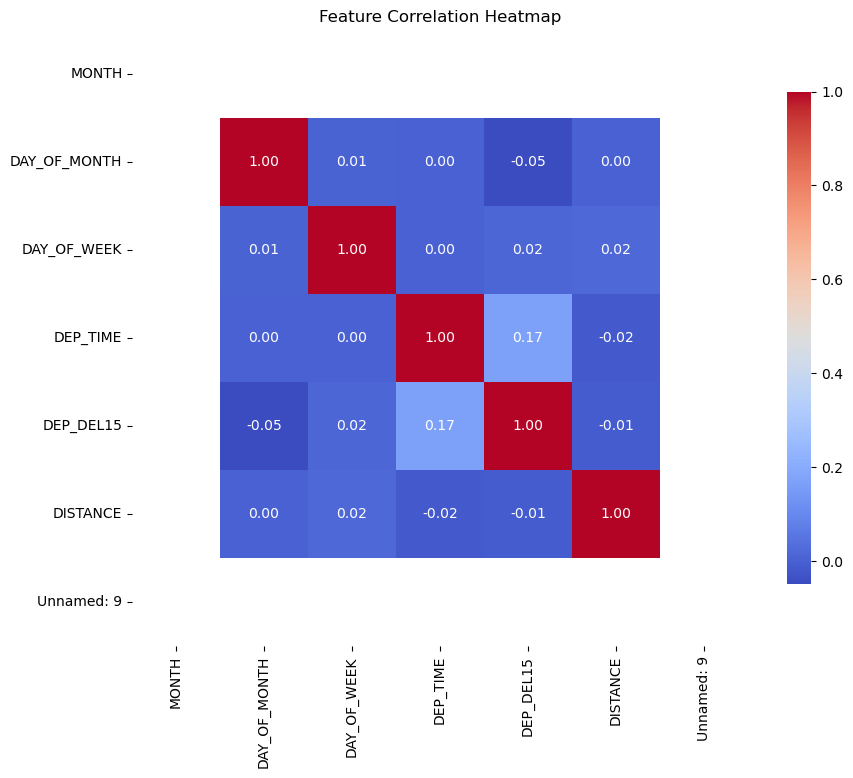

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the necessary preprocessing done

# Step 1: Calculate the correlation matrix for numerical features only
# Select only numerical features from the DataFrame
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Step 3: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Step 4: Display the heatmap
plt.title('Feature Correlation Heatmap')
plt.show()

In [99]:
# Step 5: Drop highly correlated features (correlation > 0.08)
import numpy as np  # Import numpy for triu function
threshold = 0.008

# Calculate correlation matrix for numerical features only
numerical_features = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_features.corr()  # Calculate correlation for numerical features

# Continue with the rest of the code
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(f"Dropping correlated features: {to_drop}")
df.drop(columns=to_drop, inplace=True)

Dropping correlated features: ['DEP_DEL15', 'DISTANCE']


In [101]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df
# Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()
df['OP_UNIQUE_CARRIER'] = le.fit_transform(df['OP_UNIQUE_CARRIER'])
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df['DEST'] = le.fit_transform(df['DEST'])

# Print the DataFrame
print(df.head())  # This will print the first 5 rows of the DataFrame


   MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ORIGIN  DEST  \
0      2             1            6                  9      69   198   
1      2             8            6                  9      69   198   
2      2            13            4                  9      90   305   
3      2            14            5                  9      90   305   
4      2            15            6                  9      90   305   

   DEP_TIME  Unnamed: 9  
0    1430.0         NaN  
1    1442.0         NaN  
2    2247.0         NaN  
3    2230.0         NaN  
4    2246.0         NaN  


In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
# Load your data
df = pd.read_csv('flight_data.csv')

# Fill missing values if necessary
df = df.fillna(0)

# Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()
df['OP_UNIQUE_CARRIER'] = le.fit_transform(df['OP_UNIQUE_CARRIER'])
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df['DEST'] = le.fit_transform(df['DEST'])

# Check the unique values in DEP_DEL15 before conversion
print("Unique values in DEP_DEL15 before conversion:", df['DEP_DEL15'].unique())

# Check the rows with unexpected values in DEP_DEL15
unexpected_values = df[~df['DEP_DEL15'].isin([0, 1])]
print("Rows with unexpected values in DEP_DEL15:")
print(unexpected_values)

# Convert DEP_DEL15 to binary
df['DEP_DEL15'] = df['DEP_DEL15'].apply(lambda x: 1 if x > 0.5 else 0)

# Check unique values after conversion
print("Unique values in DEP_DEL15 after conversion:", df['DEP_DEL15'].unique())

#Step 7:Prepare For Features X and Y
X = df.drop(columns=['DEP_DEL15'])  # Ensure 'DEP_DEL15' is your target column
y = df['DEP_DEL15']
# Print the first few rows of X and y
print("Features (X):")
print(X.head())  # Prints the first 5 rows of the features
print("\nTarget (y):")
print(y.head())  # Prints the first 5 rows of the target
# Check the shapes of X and y
print(f"Shapes - X: {X.shape}, y: {y.shape}")

# Proceed with train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optionally, print the first few rows of X_train, X_test, y_train, and y_test
print("\nFirst 5 rows of X_train:")
print(X_train.head())

print("\nFirst 5 rows of X_test:")
print(X_test.head())

print("\nFirst 5 rows of y_train:")
print(y_train.head())

print("\nFirst 5 rows of y_test:")
print(y_test.head())


# Step 8: XGBoost model with cross-validation to detect overfitting/underfitting
model = xgb.XGBClassifier(eval_metric='logloss')

# Perform cross-validation
try:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean()}")
except ValueError as e:
    print("Error during cross-validation:", e)


Unique values in DEP_DEL15 before conversion: [0. 1.]
Rows with unexpected values in DEP_DEL15:
Empty DataFrame
Columns: [MONTH, DAY_OF_MONTH, DAY_OF_WEEK, OP_UNIQUE_CARRIER, ORIGIN, DEST, DEP_TIME, DEP_DEL15, DISTANCE, Unnamed: 9]
Index: []
Unique values in DEP_DEL15 after conversion: [0 1]
Features (X):
   MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ORIGIN  DEST  \
0      2             1            6                  9      69   198   
1      2             8            6                  9      69   198   
2      2            13            4                  9      90   305   
3      2            14            5                  9      90   305   
4      2            15            6                  9      90   305   

   DEP_TIME  DISTANCE  Unnamed: 9  
0    1430.0     175.0         0.0  
1    1442.0     175.0         0.0  
2    2247.0     190.0         0.0  
3    2230.0     190.0         0.0  
4    2246.0     190.0         0.0  

Target (y):
0    0
1    0
2    0
3    0
4  

In [72]:
print("Unique values in y:", y.unique())

Unique values in y: [0 1]


In [ ]:
y = y.astype(int)

In [ ]:
print(y.value_counts())

Model accuracy: 0.8748323959113309
Classification Report:
              precision    recall  f1-score   support

 Not Delayed       0.88      0.99      0.93     98332
     Delayed       0.77      0.18      0.30     16522

    accuracy                           0.87    114854
   macro avg       0.83      0.59      0.61    114854
weighted avg       0.86      0.87      0.84    114854

Confusion Matrix:
[[97431   901]
 [13475  3047]]


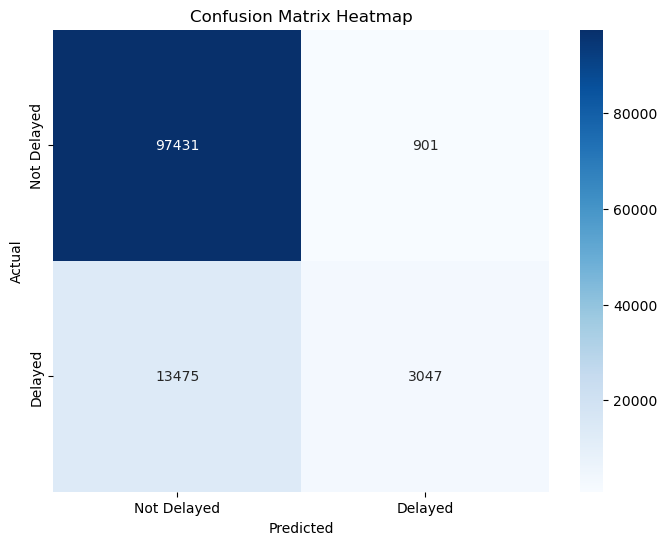

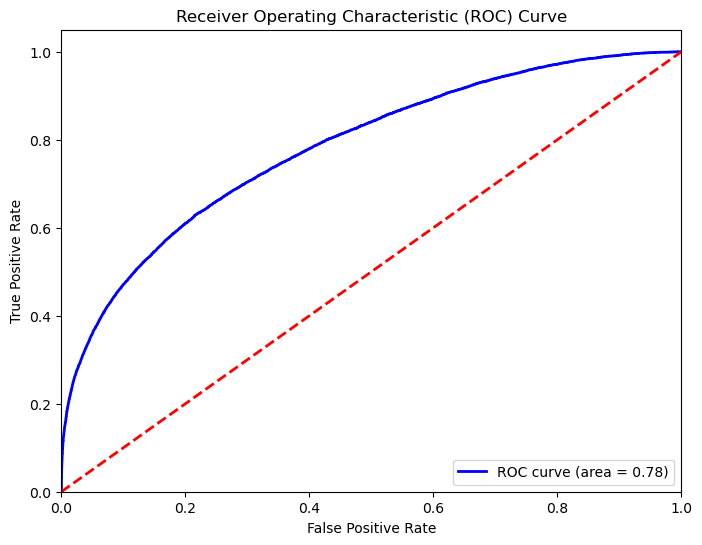

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('flight_data.csv')

# Fill missing values if necessary
df = df.fillna(0)

# Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()
df['OP_UNIQUE_CARRIER'] = le.fit_transform(df['OP_UNIQUE_CARRIER'])
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df['DEST'] = le.fit_transform(df['DEST'])

# Prepare features (X) and target (y)
X = df.drop(columns=['DEP_DEL15'])  # 'DEP_DEL15' is the target column
y = df['DEP_DEL15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Delayed', 'Delayed'])
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()